# Practical Time Series Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('fivethirtyeight')

In [2]:
!pip install statsmodels

In [3]:
df =pd.read_csv('dataset/airline-passengers.csv')
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df.Month =pd.to_datetime(df.Month)
df.set_index('Month',inplace=True)

Text(0, 0.5, 'Passengers')

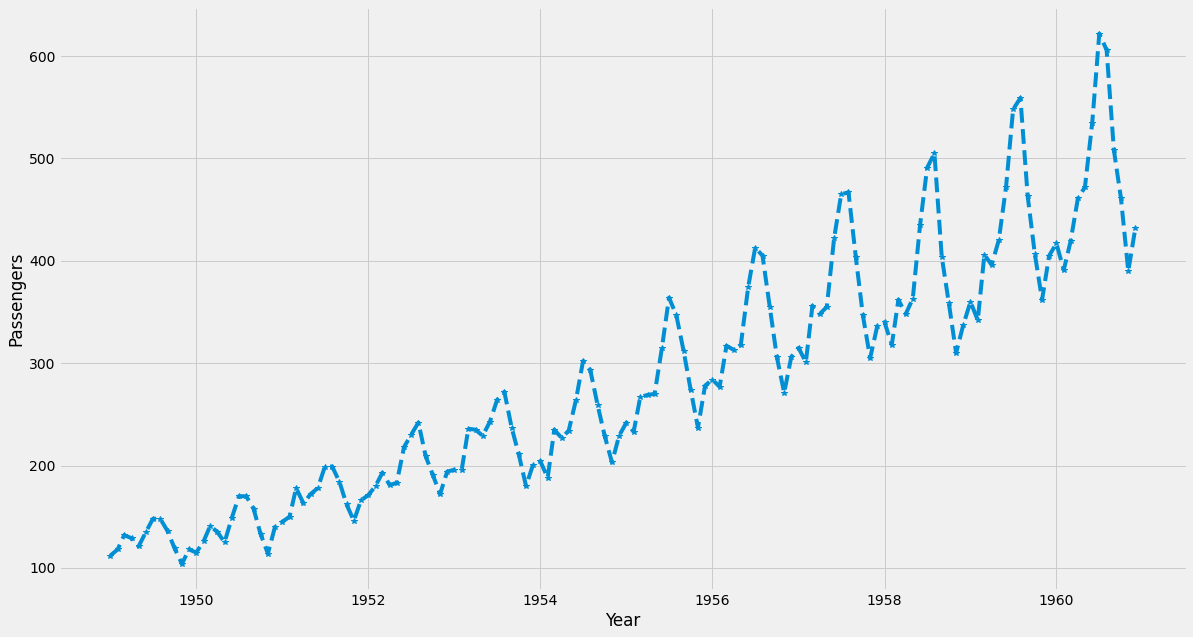

In [5]:
plt.figure(figsize=(18,10))
plt.plot(df, '--', marker='*',)
# plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

    Methods of filling the missing data
    1. Imputation: filling based on the general overview of the data, using fillna(), 
    forward fill: usingg data from previous entries, 
    backward fill: using data from the next entries
    2. Interpolation: using estimated datapoints

In [6]:
df.isnull().sum()
df.isnull().values.any()

False

In [7]:
# created a copy of the data and sampled some, 
# removed them to create missing data

df_copy = df.copy()
rows = df_copy.sample(frac=.1,random_state=0)
rows.Passengers = np.nan
df_copy.loc[rows.index,'Passengers'] = rows.Passengers

In [8]:
# now we have missing data
df_copy.isnull().sum()

Passengers    14
dtype: int64

In [9]:
# forward filling of the data

df_copy_ffill = df_copy.fillna(method='ffill')
df_copy_ffill.isnull().sum()

Passengers    0
dtype: int64

In [10]:
# backward filling data

df_copy_bfill = df_copy.fillna(method='bfill')
df_copy_bfill.isna().sum()

Passengers    0
dtype: int64

In [11]:
# interpolating

df_copy_FINT = df_copy.interpolate(method='linear',
                                  limit_direction='forward')
df_copy_BINT =df_copy.interpolate(method='linear',
                                 limit_direction='backward')


In [12]:
df_copy_bfill.loc[rows.index]

,Passengers
Month,
1949-08-01,136.0
1956-06-01,413.0
1957-02-01,356.0
1951-03-01,163.0
1958-03-01,348.0
1959-09-01,362.0
1953-12-01,204.0
1950-11-01,140.0
1959-10-01,362.0


In [13]:
df.loc[rows.index]

,Passengers
Month,
1949-08-01,148
1956-06-01,374
1957-02-01,301
1951-03-01,178
1958-03-01,362
1959-09-01,463
1953-12-01,201
1950-11-01,114
1959-10-01,407


In [14]:
df_copy_ffill.loc[rows.index]

,Passengers
Month,
1949-08-01,148.0
1956-06-01,318.0
1957-02-01,315.0
1951-03-01,150.0
1958-03-01,318.0
1959-09-01,559.0
1953-12-01,180.0
1950-11-01,133.0
1959-10-01,559.0


In [15]:
df_copy_BINT.loc[rows.index]

,Passengers
Month,
1949-08-01,142.000000
1956-06-01,365.500000
1957-02-01,335.500000
1951-03-01,156.500000
1958-03-01,333.000000
1959-09-01,493.333333
1953-12-01,192.000000
1950-11-01,136.500000
1959-10-01,427.666667


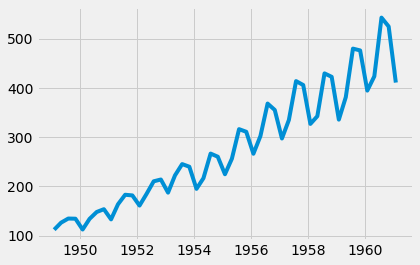

In [16]:
df_quart = df.resample('3M').mean()

plt.plot(df_quart)

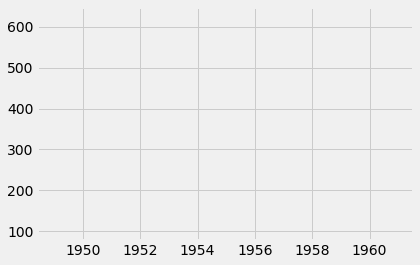

In [17]:
df_da = df.resample('D').mean()

plt.plot(df_da)

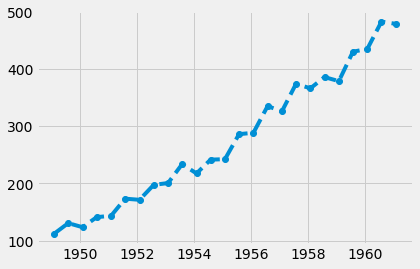

In [18]:
plt.plot(df.resample('6M').mean(), '--', marker='o')

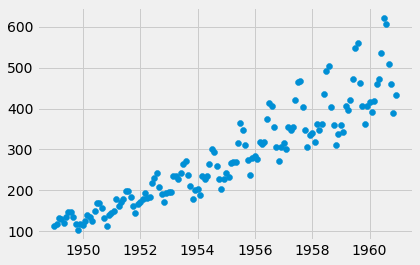

In [19]:
plt.scatter(df.index,df.Passengers)

### Smoothing

In [20]:
style.available?

In [21]:
style.use('ggplot')
# classic, bmh, seaborn-talk, seaborn-ticks,fivethirtyeight,

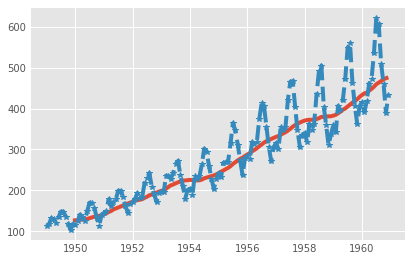

In [22]:
df_MA = df.copy()
ma = df_MA.Passengers.rolling(12).mean()
plt.plot(ma)
plt.plot(df, '--',marker='*')

### Time Series Specific Exploratory methods

using statsmodels

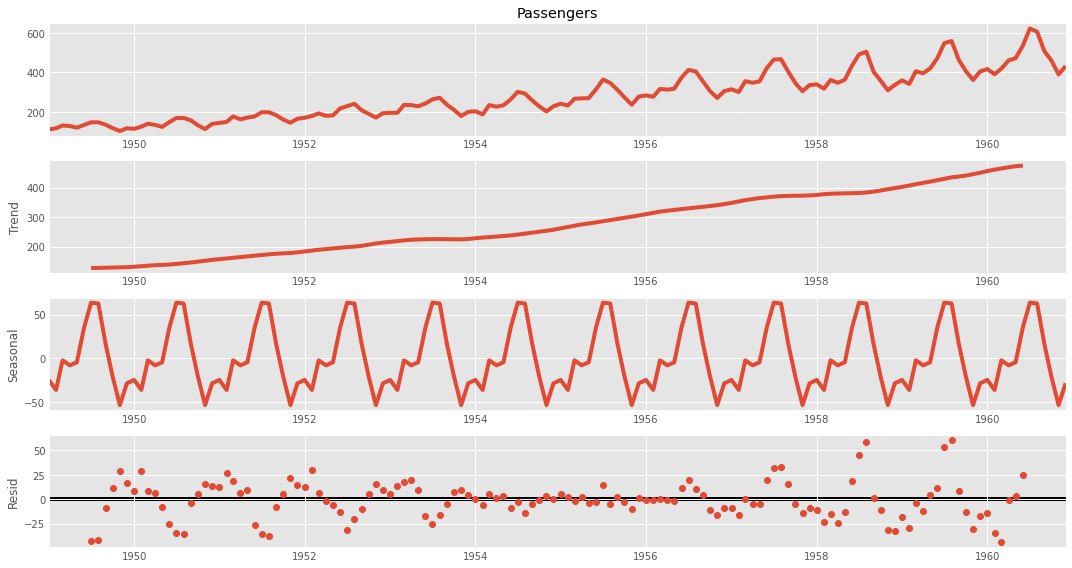

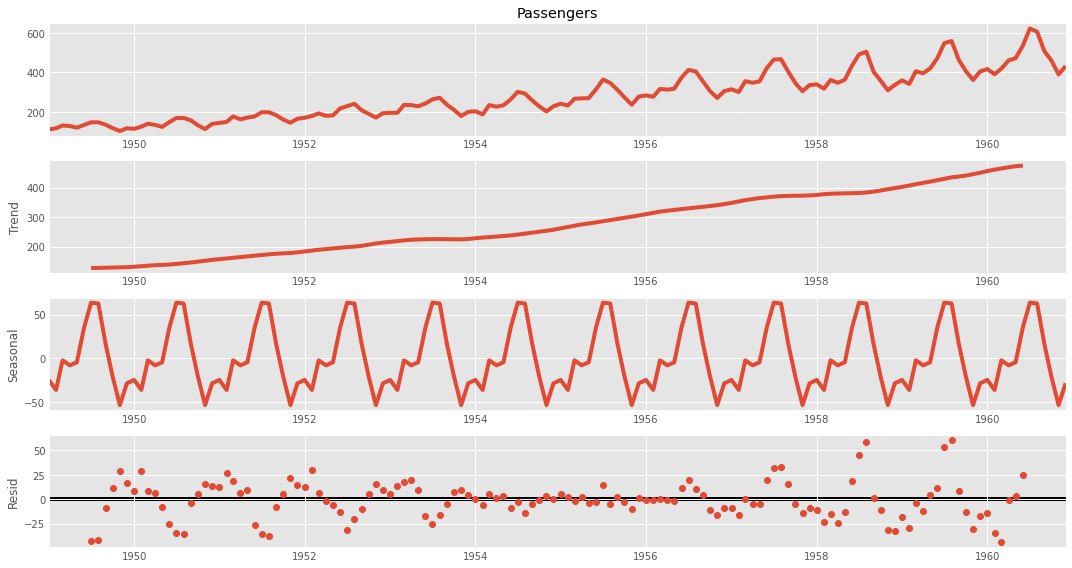

In [23]:
# the decomposed time series shows the trend and seasonality variations

import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] =15,8
decompose = sm.tsa.seasonal_decompose(df.Passengers,
                                     model='additive')
decompose.plot()


In [32]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df.Passengers)
print(f'ADF statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No of logs used: {adf_result[2]}')
print(f'No of observations: {adf_result[3]}')
print(f'critical values: ')
for k, v in adf_result[4].items():
    print(f'    {k}:{v}')

ADF statistic: 0.8153688792060518
p-value: 0.991880243437641
No of logs used: 13
No of observations: 130
critical values: 
    1%:-3.4816817173418295
    5%:-2.8840418343195267
    10%:-2.578770059171598


### to convert the data into stationary by removing trends and seasonality


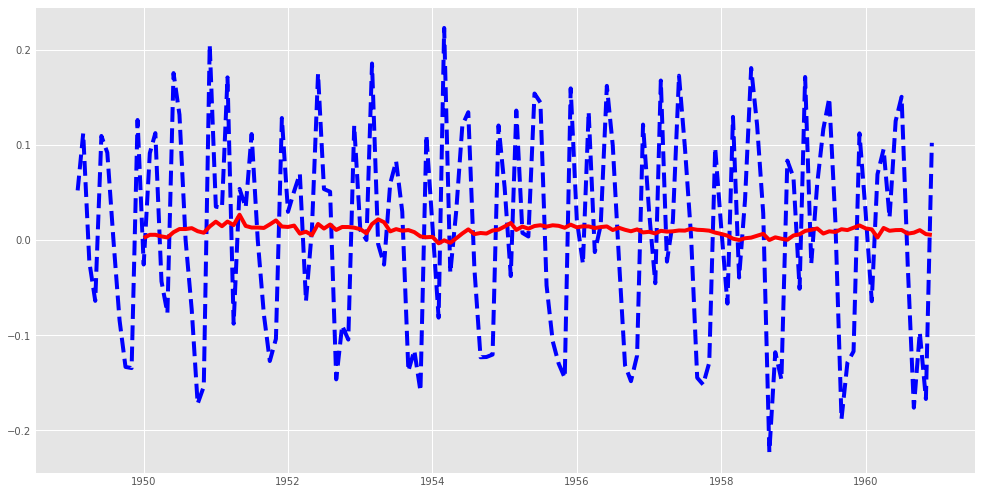

In [34]:
df_log = np.log(df)
df_diff = df_log.diff(periods=1)
plt.plot(df_diff, '--', color='b')
plt.plot(df_diff.rolling(12).mean(), color='r')

>**Stationarity Analysis, Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)**

In [35]:
# the modules
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [41]:
df_diff.fillna(method='bfill',inplace=True)

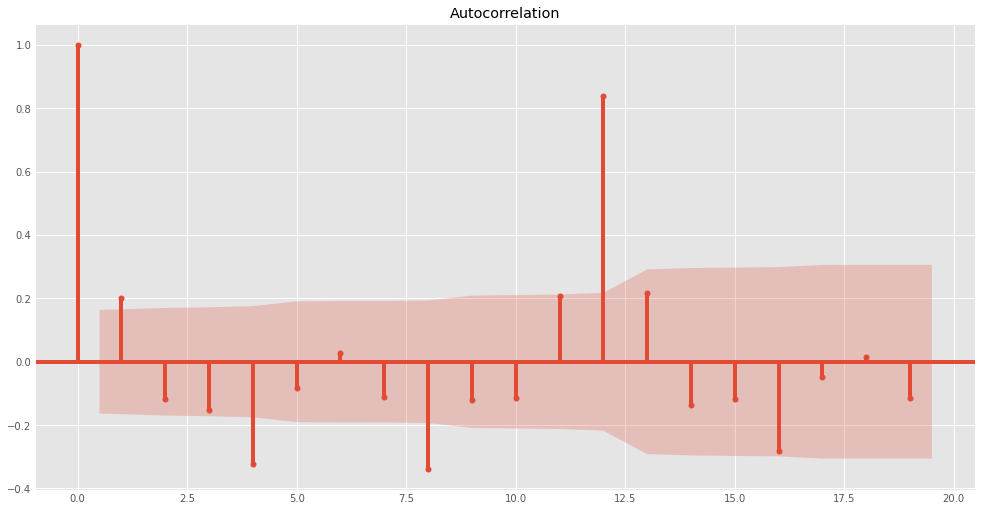

In [42]:
# acf plot
plot_acf(df_diff,lags=range(0,20))
plt.show()

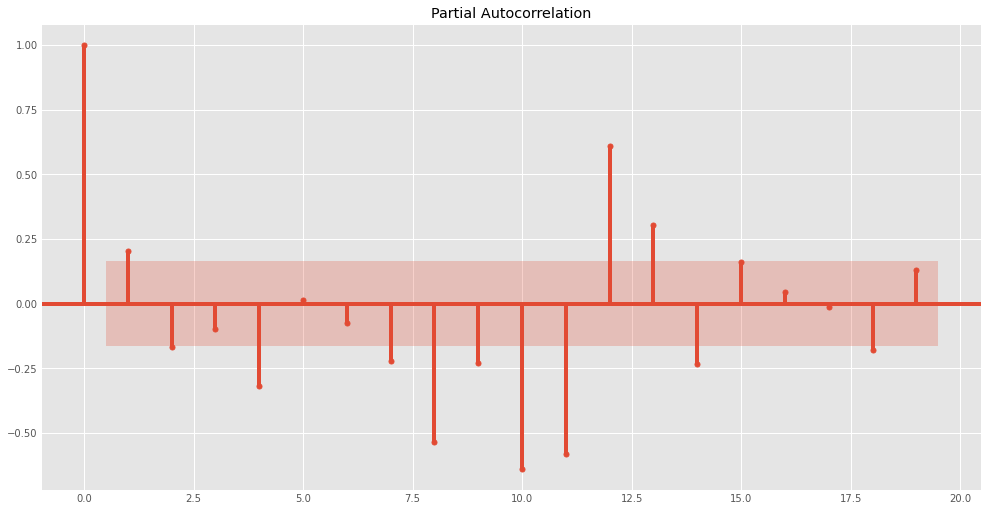

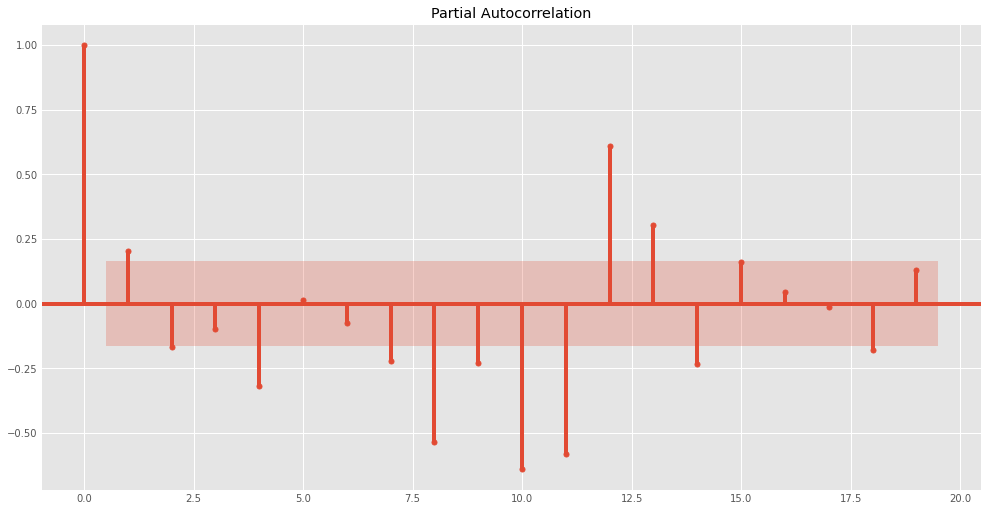

In [43]:
plot_pacf(df_diff,lags = range(20))

> **ARIMA model**

C:\Users\ADELEKE OLADAPO\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


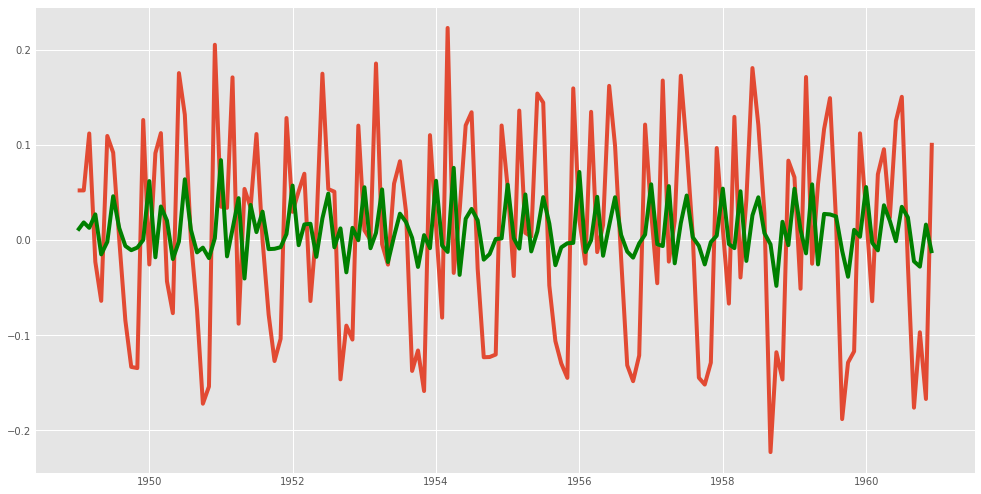

In [48]:
from statsmodels.tsa.arima_model import ARIMA
# remember ARIMA comprises of parameters p,d,q

arima = ARIMA(df_diff, order=(2,0,0))
arima_ = arima.fit()
plt.plot(df_diff)
plt.plot(arima_.fittedvalues, color='g')


In [50]:
!conda install -c conda-forge fbprophet

'conda' is not recognized as an internal or external command,
operable program or batch file.
